## Import 

In [67]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # Suppress warnings

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Dataset 1_route_quarter - Exploration and Cleaning
#### Explore route_quarter dataset
#### Dataset describes travel to and from Ireland by routes between the years of 1985 and 2008, Quarterly, by Route of Travel.

In [68]:
# Read csv file into pandas dataframe 
# url = https://data.gov.ie/dataset/tmq01-visits-to-and-from-ireland/resource/d018a88d-6944-4728-aa62-cd05074ffa5e
# route_quarter_TMQ01-Visits-to-and-from-Ireland dataset contains 8 columns and 960 rows 
# (24 years in Quarters = 96 rows), 96 rows by 2 Direction = 192 rows, 192 rows by 5 regions = 960 rows
# Columns: ROUTE, Route of Travel, TLIST(Q1), Quarter,STATISTIC, Statistic Label, UNIT, VALUE
route_quarter = pd.read_csv("TMQ01-Visits-to-and-from-Ireland.csv")
route_quarter.shape
print(route_quarter.columns)
route_quarter.head()

(960, 8)

Index(['ROUTE', 'Route of Travel', 'TLIST(Q1)', 'Quarter', 'STATISTIC',
       'Statistic Label', 'UNIT', 'VALUE'],
      dtype='object')


,ROUTE,Route of Travel,TLIST(Q1),Quarter,STATISTIC,Statistic Label,UNIT,VALUE
0,0,All Routes,19851,1985Q1,TMQ01C1,Visitors to Ireland,Thousand,254
1,0,All Routes,19851,1985Q1,TMQ01C2,Visits Abroad by Irish Residents,Thousand,186
2,0,All Routes,19852,1985Q2,TMQ01C1,Visitors to Ireland,Thousand,495
3,0,All Routes,19852,1985Q2,TMQ01C2,Visits Abroad by Irish Residents,Thousand,336
4,0,All Routes,19853,1985Q3,TMQ01C1,Visitors to Ireland,Thousand,840


## Display value counts for each column in the dataframe

In [69]:
route_quarter['ROUTE'].value_counts()
route_quarter['Route of Travel'].value_counts()
route_quarter['TLIST(Q1)'].value_counts()
route_quarter['Quarter'].value_counts()
route_quarter['STATISTIC'].value_counts()
route_quarter['Statistic Label'].value_counts()
route_quarter['UNIT'].value_counts()
route_quarter['VALUE'].value_counts(bins=5)

ROUTE
0    192
1    192
2    192
3    192
4    192
Name: count, dtype: int64

Route of Travel
All Routes            192
Air Cross Channel     192
Sea Cross Channel     192
Continental Europe    192
Transatlantic         192
Name: count, dtype: int64

TLIST(Q1)
19851    10
19852    10
20023    10
20022    10
20021    10
20014    10
20013    10
20012    10
20011    10
20004    10
20003    10
20002    10
20001    10
19994    10
19993    10
19992    10
19991    10
19984    10
19983    10
19982    10
19981    10
19974    10
19973    10
20024    10
20031    10
20032    10
20062    10
20083    10
20082    10
20081    10
20074    10
20073    10
20072    10
20071    10
20064    10
20063    10
20061    10
20033    10
20054    10
20053    10
20052    10
20051    10
20044    10
20043    10
20042    10
20041    10
20034    10
19972    10
19971    10
19964    10
19881    10
19902    10
19901    10
19894    10
19893    10
19892    10
19891    10
19884    10
19883    10
19882    10
19874    10
19904    10
19873    10
19872    10
19871    10
19864    10
19863    10
19862    10
19861    10
19854    10
19853    10
19903    10
19911    10
19963    10
19941    10
19962    10
19961    10
19954    10
19953    10
19952    10
19951    10
19944    10
19943 

Quarter
1985Q1    10
1985Q2    10
2002Q3    10
2002Q2    10
2002Q1    10
2001Q4    10
2001Q3    10
2001Q2    10
2001Q1    10
2000Q4    10
2000Q3    10
2000Q2    10
2000Q1    10
1999Q4    10
1999Q3    10
1999Q2    10
1999Q1    10
1998Q4    10
1998Q3    10
1998Q2    10
1998Q1    10
1997Q4    10
1997Q3    10
2002Q4    10
2003Q1    10
2003Q2    10
2006Q2    10
2008Q3    10
2008Q2    10
2008Q1    10
2007Q4    10
2007Q3    10
2007Q2    10
2007Q1    10
2006Q4    10
2006Q3    10
2006Q1    10
2003Q3    10
2005Q4    10
2005Q3    10
2005Q2    10
2005Q1    10
2004Q4    10
2004Q3    10
2004Q2    10
2004Q1    10
2003Q4    10
1997Q2    10
1997Q1    10
1996Q4    10
1988Q1    10
1990Q2    10
1990Q1    10
1989Q4    10
1989Q3    10
1989Q2    10
1989Q1    10
1988Q4    10
1988Q3    10
1988Q2    10
1987Q4    10
1990Q4    10
1987Q3    10
1987Q2    10
1987Q1    10
1986Q4    10
1986Q3    10
1986Q2    10
1986Q1    10
1985Q4    10
1985Q3    10
1990Q3    10
1991Q1    10
1996Q3    10
1994Q1    10
1996Q2    10
1996

STATISTIC
TMQ01C1    480
TMQ01C2    480
Name: count, dtype: int64

Statistic Label
Visitors to Ireland                 480
Visits Abroad by Irish Residents    480
Name: count, dtype: int64

UNIT
Thousand    960
Name: count, dtype: int64

(2.359, 533.0]      711
(533.0, 1061.0]     158
(1061.0, 1589.0]     51
(1589.0, 2117.0]     26
(2117.0, 2645.0]     14
Name: count, dtype: int64

## Edit Dataframe 1 - Data Cleaning 
### Remove, Rename and Transform columns

In [70]:
# Remove 'UNIT' column as 'VALUE' column heading will be amended to reflect units. 
# Remove 'ROUTE' column as 'Route of Travel' contains the same information in human readable language.
# Remove 'STATISTIC' column as this data is contained within 'Quarter' and 'Statistic Label' columns in human readable language.
route_quarter_tourism = route_quarter.drop(columns=['UNIT', 'ROUTE', 'STATISTIC'])

# Rename 'TLIST(Q1)' column to Year
route_quarter_tourism.rename(columns={"TLIST(Q1)": "Year"}, inplace=True)

# Last character in 'Year' column refers to quarter (1-4) 
# Remove last character from by dividing by 10 and saving as integer to remove non-whole numbers. e.g. 19854 -> 1985.4 = 1985
route_quarter_tourism["Year"] = route_quarter_tourism["Year"].transform(lambda x: x / 10).astype(int)

# The'Quarter' column contains the year and Q before the number designating the quarter. e.g. 1985Q4
# Transform 'Quarter' column, reassigning last character of each entry as integer reflecting the quarter. e.g. 1985Q4 = 4
route_quarter_tourism["Quarter"] = route_quarter_tourism["Quarter"].transform(lambda x: str(x)[-1]).astype(int)

# Rename 'Statistic Label' column for Direction
route_quarter_tourism.rename(columns={"Statistic Label": "Direction"}, inplace=True)

# Rename Column for Travellers x 1,000
route_quarter_tourism.rename(columns={"VALUE": "Travellers x(1,000)"}, inplace=True)

route_quarter_tourism.shape

(960, 5)

### Explore edited route_quarter dataset

In [71]:
route_quarter_tourism.shape
print(route_quarter_tourism.columns)
route_quarter_tourism.head()


(960, 5)

Index(['Route of Travel', 'Year', 'Quarter', 'Direction',
       'Travellers x(1,000)'],
      dtype='object')


,Route of Travel,Year,Quarter,Direction,"Travellers x(1,000)"
0,All Routes,1985,1,Visitors to Ireland,254
1,All Routes,1985,1,Visits Abroad by Irish Residents,186
2,All Routes,1985,2,Visitors to Ireland,495
3,All Routes,1985,2,Visits Abroad by Irish Residents,336
4,All Routes,1985,3,Visitors to Ireland,840


## Display value counts for each column in the edited dataframe

In [72]:
route_quarter_tourism['Route of Travel'].value_counts()
route_quarter_tourism['Year'].value_counts()
route_quarter_tourism['Quarter'].value_counts()
route_quarter_tourism['Direction'].value_counts()
route_quarter_tourism['Travellers x(1,000)'].value_counts(bins=5)


Route of Travel
All Routes            192
Air Cross Channel     192
Sea Cross Channel     192
Continental Europe    192
Transatlantic         192
Name: count, dtype: int64

Year
1985    40
1986    40
2007    40
2006    40
2005    40
2004    40
2003    40
2002    40
2001    40
2000    40
1999    40
1998    40
1997    40
1996    40
1995    40
1994    40
1993    40
1992    40
1991    40
1990    40
1989    40
1988    40
1987    40
2008    40
Name: count, dtype: int64

Quarter
1    240
2    240
3    240
4    240
Name: count, dtype: int64

Direction
Visitors to Ireland                 480
Visits Abroad by Irish Residents    480
Name: count, dtype: int64

(2.359, 533.0]      711
(533.0, 1061.0]     158
(1061.0, 1589.0]     51
(1589.0, 2117.0]     26
(2117.0, 2645.0]     14
Name: count, dtype: int64

## Assess change in the distribution of cross channel route of travel over time.

### Assessing travel into Ireland

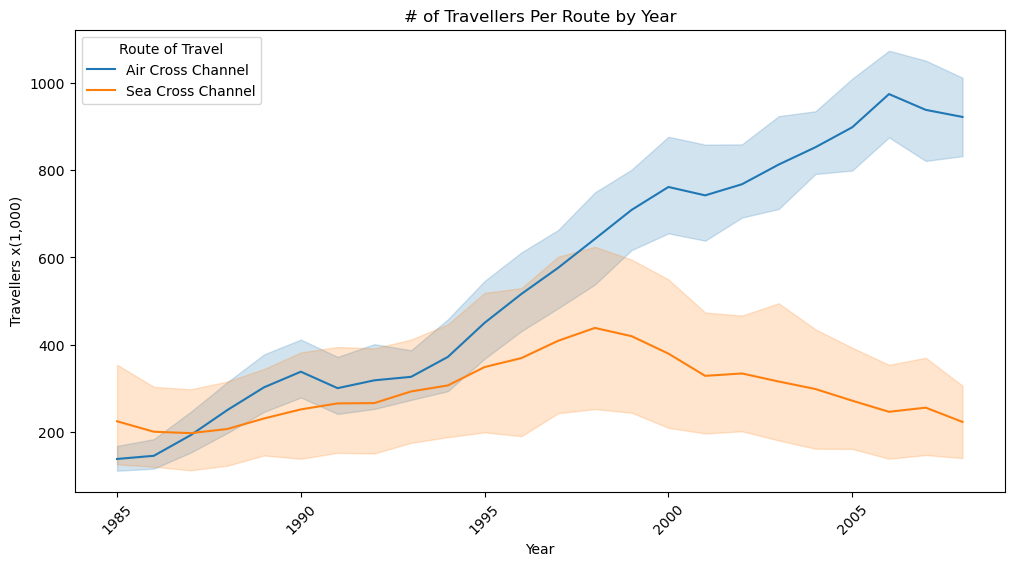

In [73]:
x_channel = route_quarter_tourism.loc[((route_quarter_tourism['Route of Travel'] == 'Air Cross Channel') | (route_quarter_tourism['Route of Travel'] == 'Sea Cross Channel')) & (route_quarter_tourism['Direction'] == 'Visitors to Ireland')]
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
ax = sns.lineplot(x="Year", y="Travellers x(1,000)", hue="Route of Travel", data=x_channel)
ax.set_title('# of Travellers Per Route by Year');

### Defining a function to determine frequency distribution of of two routes of travel cross channel 

In [74]:
# Calculate the sum for all Routes of Travel per **year - quarter - direction**
def calculate_frequencies(df):
    print(df.shape)

    sums = df.groupby(['Year', 'Quarter', 'Direction'], as_index=False).sum()
    sums.rename(columns={"Travellers x(1,000)": "Total Num"}, inplace=True)

    # Calculate the number of unique routes, because this is how many times we need to repeat each sum for the division operation
    repeats = df['Route of Travel'].nunique()
    # Extract the total numbers per **year - quarter - direction** and repeat them 3 times, because we have 3 routes
    mask = sums.loc[sums.index.repeat(repeats)].reset_index(drop=True)['Total Num']
    print(mask.shape) # I am making sure the shape of the mask matches the shape of the dataframe we will apply this to

    mask.head()

    # We have to prodive 'ignore_index=True', because otherwise the division by the totals_mask will produce NaN values, as indexes are misaligned
    df.sort_values(by=['Year', 'Quarter', 'Direction', 'Route of Travel'], inplace=True, ignore_index=True)

    #concatenated_route_quarter_tourism['Distribution']
    df['Distribution Per Route'] = df['Travellers x(1,000)'] / mask
    return df

In [75]:
freqs = calculate_frequencies(x_channel)
freqs['year quarter'] = freqs['Year'].astype(str) + 'Q' + freqs['Quarter'].astype(str)
freqs

(192, 5)
(192,)


,Route of Travel,Year,Quarter,Direction,"Travellers x(1,000)",Distribution Per Route,year quarter
0,Air Cross Channel,1985,1,Visitors to Ireland,110,0.521327,1985Q1
1,Sea Cross Channel,1985,1,Visitors to Ireland,101,0.478673,1985Q1
2,Air Cross Channel,1985,2,Visitors to Ireland,142,0.387978,1985Q2
3,Sea Cross Channel,1985,2,Visitors to Ireland,224,0.612022,1985Q2
4,Air Cross Channel,1985,3,Visitors to Ireland,186,0.305921,1985Q3
5,Sea Cross Channel,1985,3,Visitors to Ireland,422,0.694079,1985Q3
6,Air Cross Channel,1985,4,Visitors to Ireland,112,0.429119,1985Q4
7,Sea Cross Channel,1985,4,Visitors to Ireland,149,0.570881,1985Q4
8,Air Cross Channel,1986,1,Visitors to Ireland,106,0.490741,1986Q1
9,Sea Cross Channel,1986,1,Visitors to Ireland,110,0.509259,1986Q1


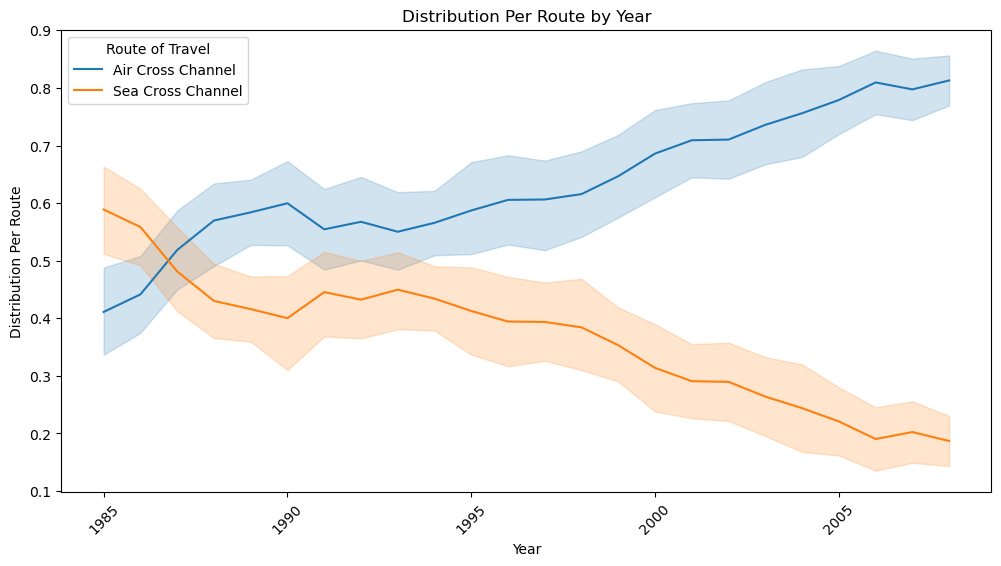

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=freqs)
plt.xticks(rotation=45)
ax.set_title('Distribution Per Route by Year')
plt.show(); # Put semicolon as per https://stackoverflow.com/questions/51030011/maplotlib-gives-the-list-of-array-outputs-before-showing-the-scatter-plot-in-pyt as otherise it will show the array of the output before the

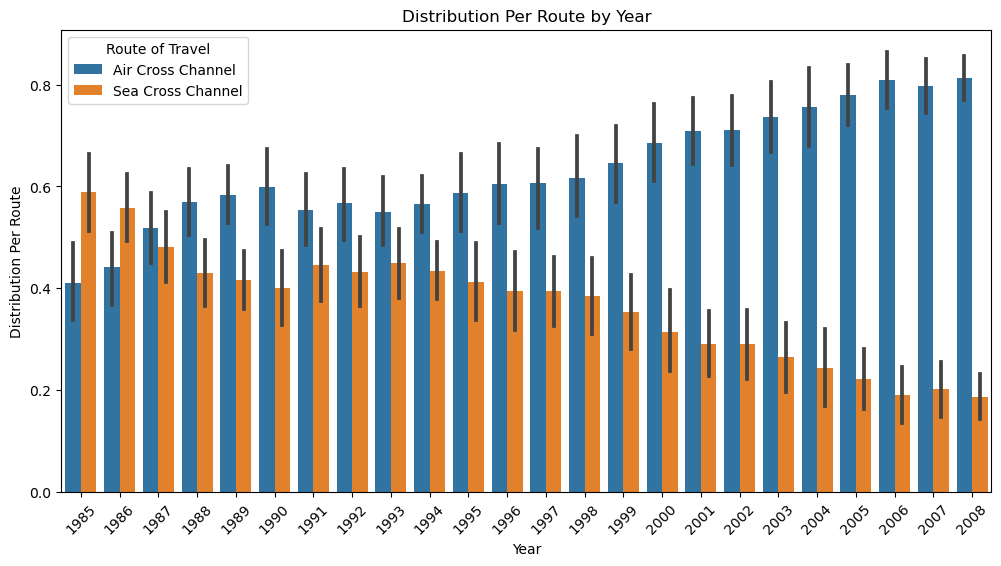

In [77]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=freqs)
plt.xticks(rotation=45)
ax.set_title('Distribution Per Route by Year');

### Assessing change in distribution of cross channel route travel per Quarter over time

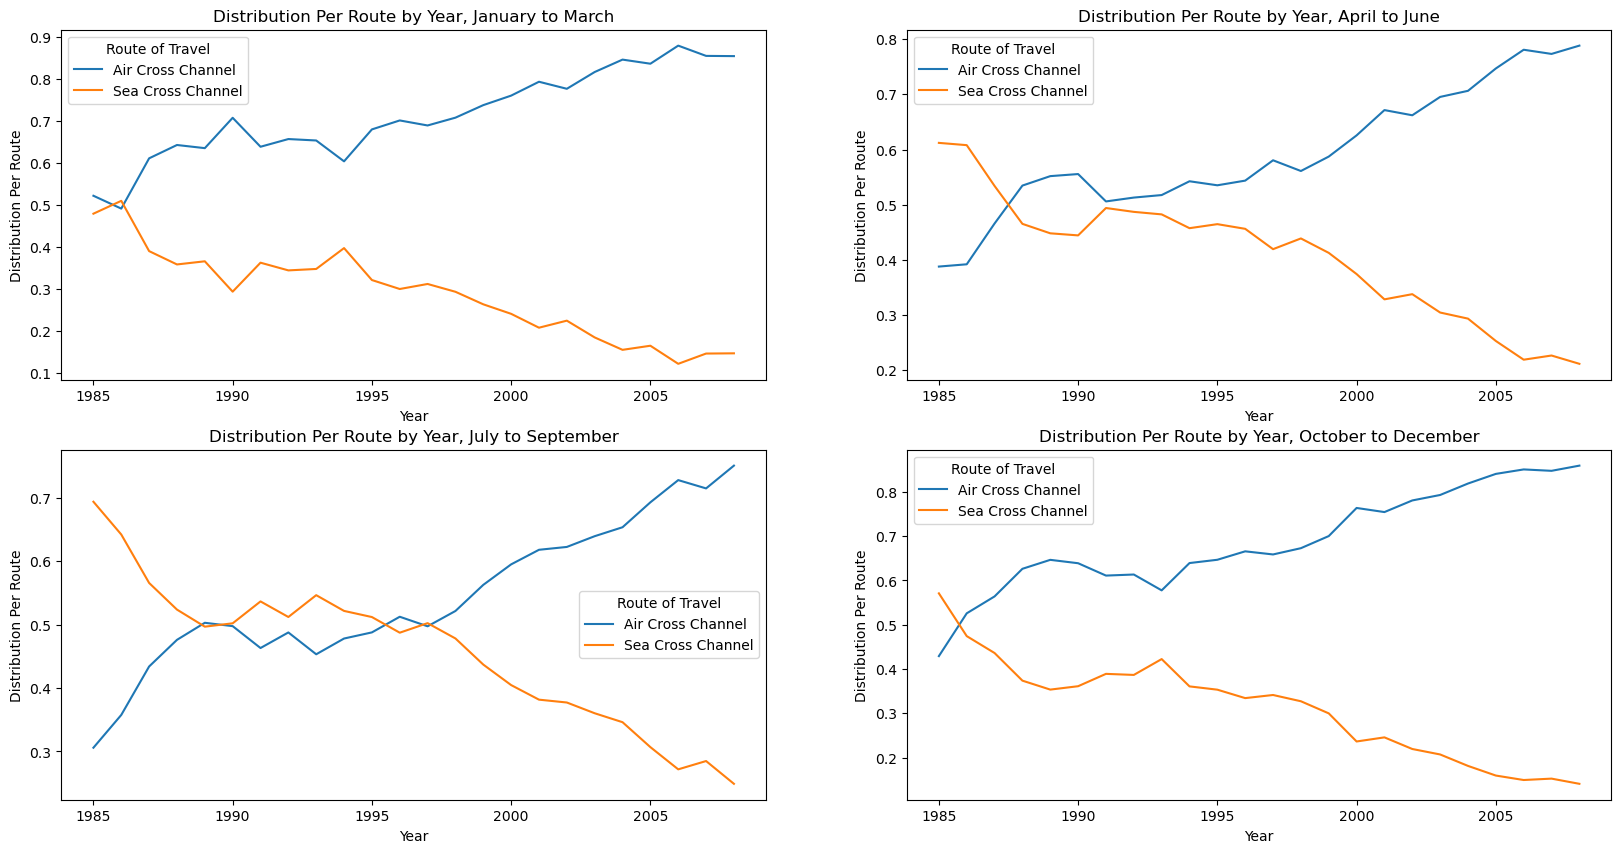

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

q1 = freqs.loc[(freqs['Quarter'] == 1)]
sns.lineplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=q1, ax=axes[0, 0])

q2 = freqs.loc[(freqs['Quarter'] == 2)]
sns.lineplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=q2, ax=axes[0, 1])

q3 = freqs.loc[(freqs['Quarter'] == 3)]
sns.lineplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=q3, ax=axes[1, 0])

q4 = freqs.loc[(freqs['Quarter'] == 4)]
sns.lineplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=q4, ax=axes[1, 1])

axes[0, 0].set_title('Distribution Per Route by Year, January to March')
axes[0, 1].set_title('Distribution Per Route by Year, April to June')
axes[1, 0].set_title('Distribution Per Route by Year, July to September')
axes[1, 1].set_title('Distribution Per Route by Year, October to December')

plt.show();


In [79]:
freqs.head()

,Route of Travel,Year,Quarter,Direction,"Travellers x(1,000)",Distribution Per Route,year quarter
0,Air Cross Channel,1985,1,Visitors to Ireland,110,0.521327,1985Q1
1,Sea Cross Channel,1985,1,Visitors to Ireland,101,0.478673,1985Q1
2,Air Cross Channel,1985,2,Visitors to Ireland,142,0.387978,1985Q2
3,Sea Cross Channel,1985,2,Visitors to Ireland,224,0.612022,1985Q2
4,Air Cross Channel,1985,3,Visitors to Ireland,186,0.305921,1985Q3


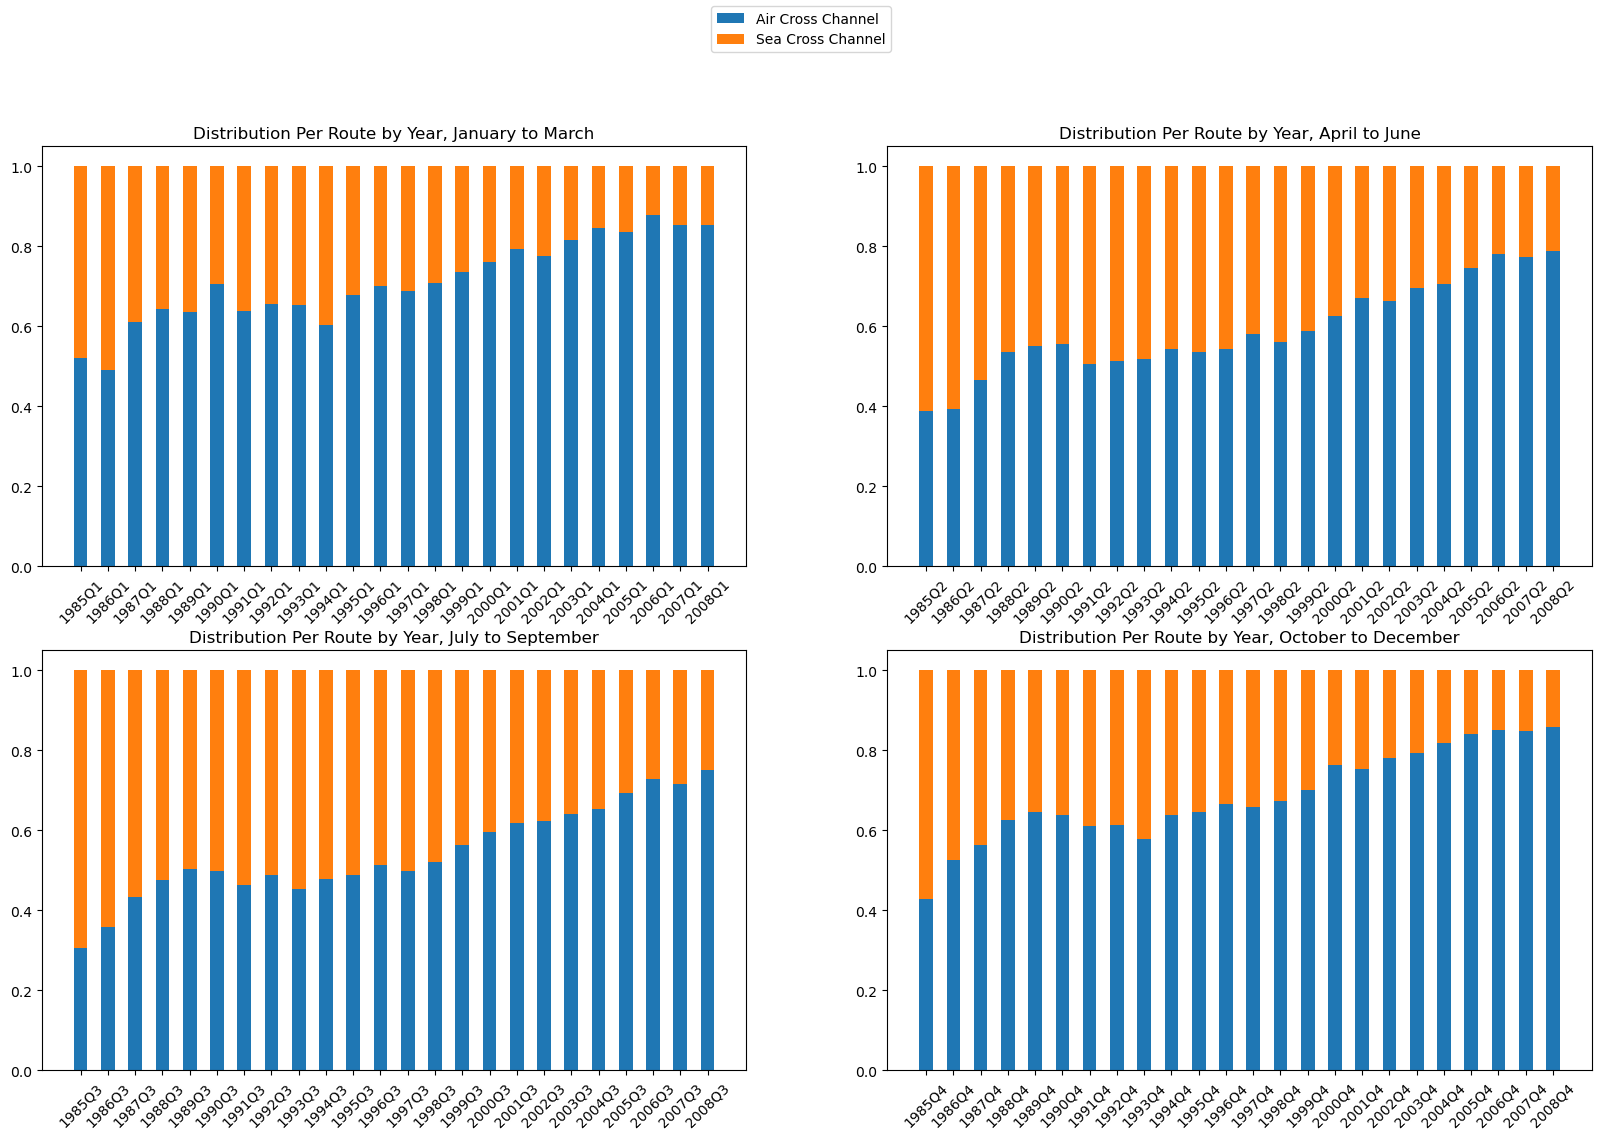

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

q1 = freqs.loc[(freqs['Quarter'] == 1)]
air1 = q1.loc[q1['Route of Travel'] == 'Air Cross Channel']
_ = axes[0, 0].bar(air1['year quarter'], air1['Distribution Per Route'], 0.5, label='Air Cross Channel', bottom=0)
sea1 = q1.loc[q1['Route of Travel'] == 'Sea Cross Channel']
_ = axes[0, 0].bar(sea1['year quarter'], sea1['Distribution Per Route'], 0.5, label='Sea Cross Channel', bottom=air1['Distribution Per Route'].to_numpy())

q2 = freqs.loc[(freqs['Quarter'] == 2)]
air2 = q2.loc[q2['Route of Travel'] == 'Air Cross Channel']
_ = axes[0, 1].bar(air2['year quarter'], air2['Distribution Per Route'], 0.5, label='Air Cross Channel', bottom=0)
sea2 = q2.loc[q2['Route of Travel'] == 'Sea Cross Channel']
_ = axes[0, 1].bar(sea2['year quarter'], sea2['Distribution Per Route'], 0.5, label='Sea Cross Channel', bottom=air2['Distribution Per Route'].to_numpy())

q3 = freqs.loc[(freqs['Quarter'] == 3)]
air3 = q3.loc[q3['Route of Travel'] == 'Air Cross Channel']
_ = axes[1, 0].bar(air3['year quarter'], air3['Distribution Per Route'], 0.5, label='Air Cross Channel', bottom=0)
sea3 = q3.loc[q3['Route of Travel'] == 'Sea Cross Channel']
_ = axes[1, 0].bar(sea3['year quarter'], sea3['Distribution Per Route'], 0.5, label='Sea Cross Channel', bottom=air3['Distribution Per Route'].to_numpy())

q4 = freqs.loc[(freqs['Quarter'] == 4)]
air4 = q4.loc[q4['Route of Travel'] == 'Air Cross Channel']
_ = axes[1, 1].bar(air4['year quarter'], air4['Distribution Per Route'], 0.5, label='Air Cross Channel', bottom=0)
sea4 = q4.loc[q4['Route of Travel'] == 'Sea Cross Channel']
_ = axes[1, 1].bar(sea4['year quarter'], sea4['Distribution Per Route'], 0.5, label='Sea Cross Channel', bottom=air4['Distribution Per Route'].to_numpy())

axes[0, 0].xaxis.set_tick_params(rotation=45)
axes[0, 0].set_title('Distribution Per Route by Year, January to March')

axes[0, 1].xaxis.set_tick_params(rotation=45)
axes[0, 1].set_title('Distribution Per Route by Year, April to June')

axes[1, 0].xaxis.set_tick_params(rotation=45)
axes[1, 0].set_title('Distribution Per Route by Year, July to September')

axes[1, 1].xaxis.set_tick_params(rotation=45)
axes[1, 1].set_title('Distribution Per Route by Year, October to December')

# Taken from https://stackoverflow.com/questions/9834452/how-do-i-make-a-single-legend-for-many-subplots
h, l = axes[0, 0].get_legend_handles_labels()
fig.legend(h, l, loc='upper center')

plt.show();


### Assessing travel out of Ireland

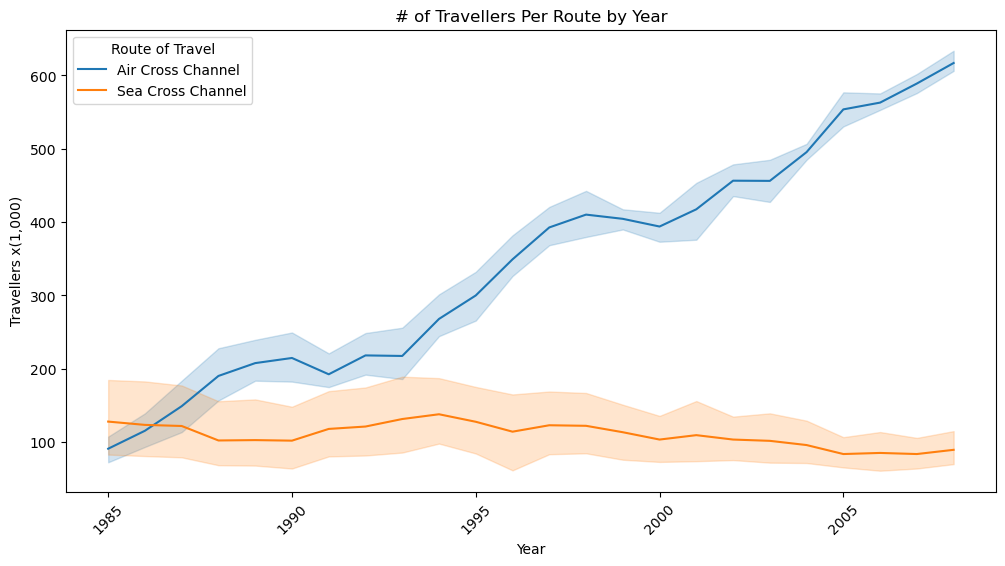

In [81]:
x_channel = route_quarter_tourism.loc[((route_quarter_tourism['Route of Travel'] == 'Air Cross Channel') | (route_quarter_tourism['Route of Travel'] == 'Sea Cross Channel')) & (route_quarter_tourism['Direction'] == 'Visits Abroad by Irish Residents')]
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
ax = sns.lineplot(x="Year", y="Travellers x(1,000)", hue="Route of Travel", data=x_channel)
ax.set_title('# of Travellers Per Route by Year');

In [82]:
freqs = calculate_frequencies(x_channel)
freqs['year quarter'] = freqs['Year'].astype(str) + 'Q' + freqs['Quarter'].astype(str)
freqs
freqs.dtypes

(192, 5)
(192,)


,Route of Travel,Year,Quarter,Direction,"Travellers x(1,000)",Distribution Per Route,year quarter
0,Air Cross Channel,1985,1,Visits Abroad by Irish Residents,65,0.464286,1985Q1
1,Sea Cross Channel,1985,1,Visits Abroad by Irish Residents,75,0.535714,1985Q1
2,Air Cross Channel,1985,2,Visits Abroad by Irish Residents,91,0.411765,1985Q2
3,Sea Cross Channel,1985,2,Visits Abroad by Irish Residents,130,0.588235,1985Q2
4,Air Cross Channel,1985,3,Visits Abroad by Irish Residents,113,0.343465,1985Q3
5,Sea Cross Channel,1985,3,Visits Abroad by Irish Residents,216,0.656535,1985Q3
6,Air Cross Channel,1985,4,Visits Abroad by Irish Residents,95,0.510753,1985Q4
7,Sea Cross Channel,1985,4,Visits Abroad by Irish Residents,91,0.489247,1985Q4
8,Air Cross Channel,1986,1,Visits Abroad by Irish Residents,86,0.530864,1986Q1
9,Sea Cross Channel,1986,1,Visits Abroad by Irish Residents,76,0.469136,1986Q1


Route of Travel            object
Year                        int32
Quarter                     int32
Direction                  object
Travellers x(1,000)         int64
Distribution Per Route    float64
year quarter               object
dtype: object

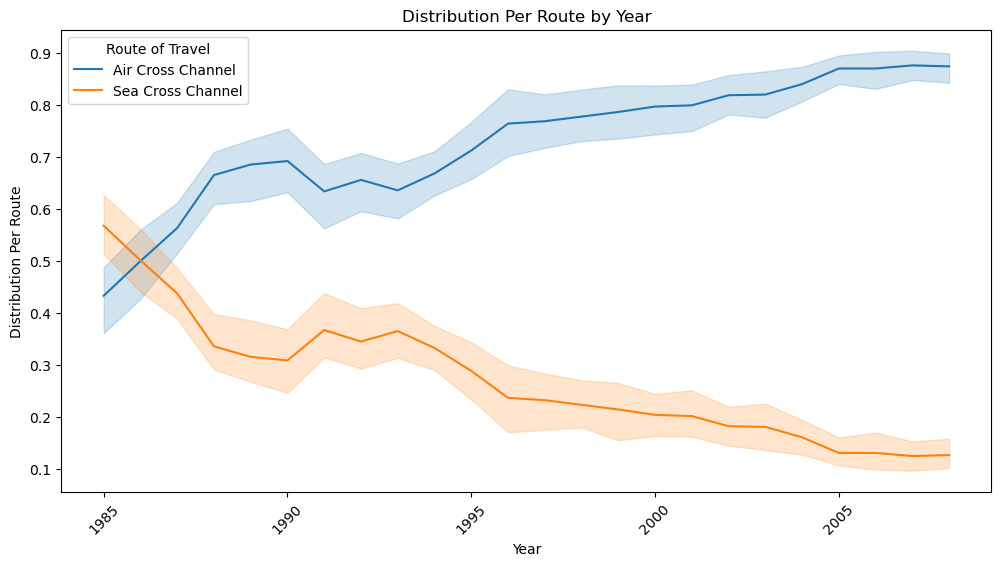

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=freqs)
plt.xticks(rotation=45)
ax.set_title('Distribution Per Route by Year')
plt.show(); # Put semicolon as per https://stackoverflow.com/questions/51030011/maplotlib-gives-the-list-of-array-outputs-before-showing-the-scatter-plot-in-pyt as otherise it will show the array of the output before the

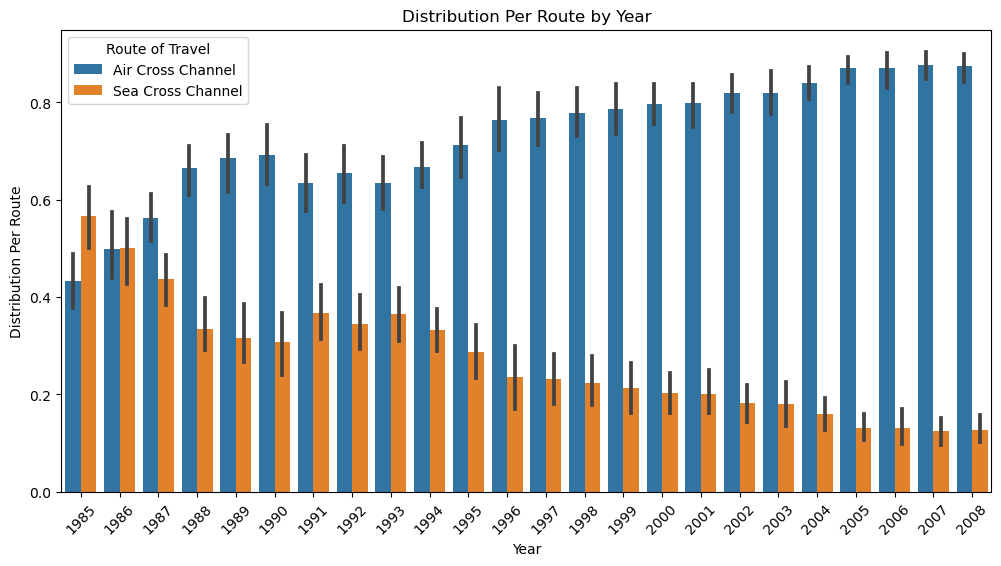

In [84]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=freqs)
plt.xticks(rotation=45)
ax.set_title('Distribution Per Route by Year');

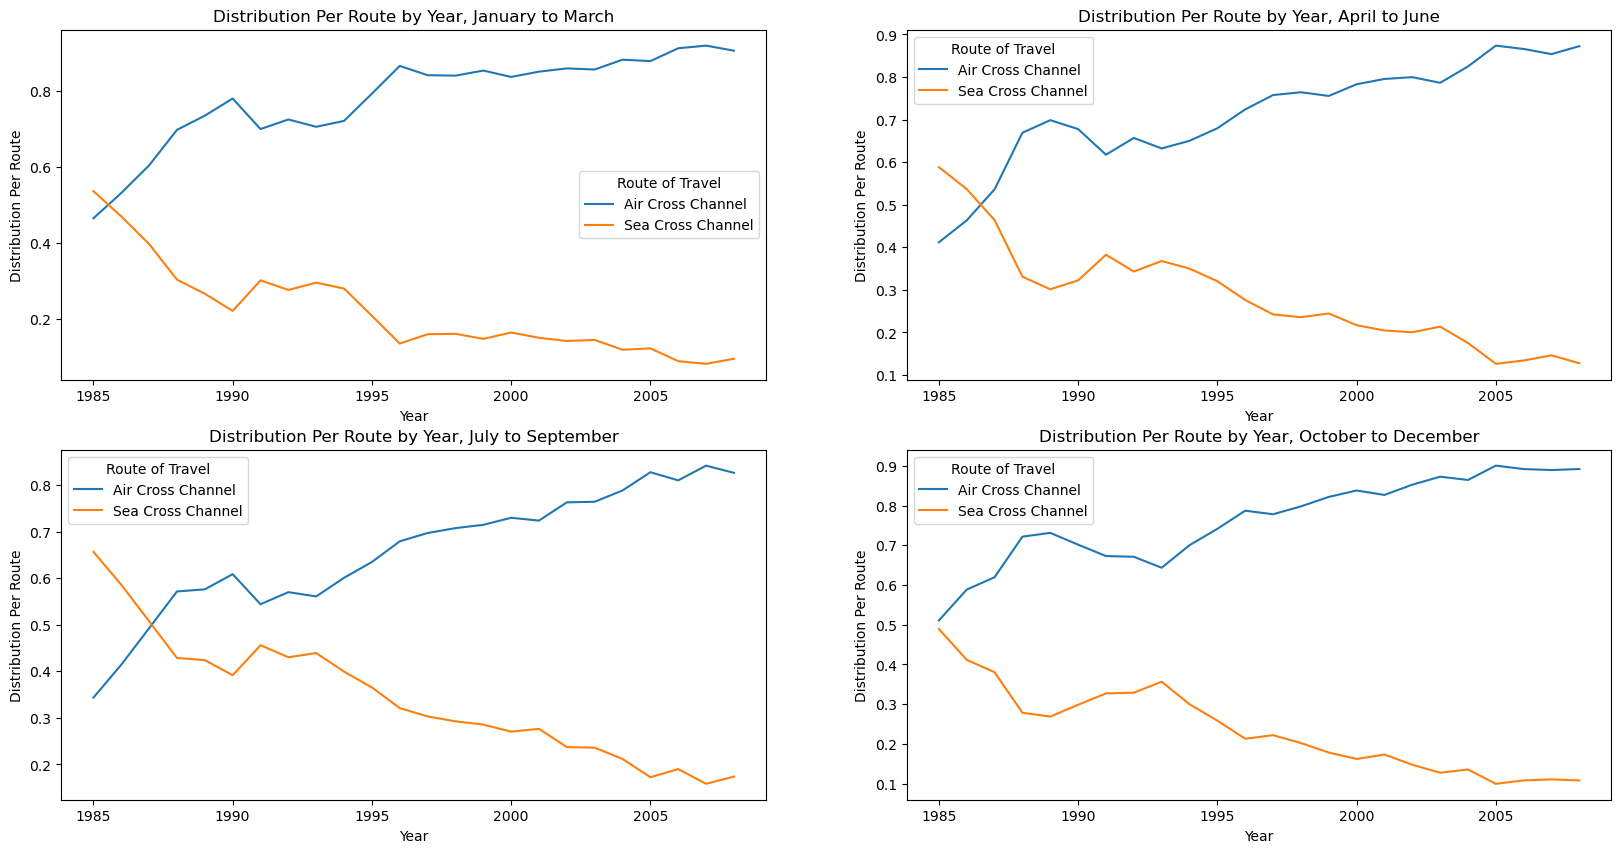

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

q1 = freqs.loc[(freqs['Quarter'] == 1)]
sns.lineplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=q1, ax=axes[0, 0])

q2 = freqs.loc[(freqs['Quarter'] == 2)]
sns.lineplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=q2, ax=axes[0, 1])

q3 = freqs.loc[(freqs['Quarter'] == 3)]
sns.lineplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=q3, ax=axes[1, 0])

q4 = freqs.loc[(freqs['Quarter'] == 4)]
sns.lineplot(x="Year", y="Distribution Per Route", hue="Route of Travel", data=q4, ax=axes[1, 1])

axes[0, 0].set_title('Distribution Per Route by Year, January to March')
axes[0, 1].set_title('Distribution Per Route by Year, April to June')
axes[1, 0].set_title('Distribution Per Route by Year, July to September')
axes[1, 1].set_title('Distribution Per Route by Year, October to December')

plt.show();


In [86]:
freqs.head()

,Route of Travel,Year,Quarter,Direction,"Travellers x(1,000)",Distribution Per Route,year quarter
0,Air Cross Channel,1985,1,Visits Abroad by Irish Residents,65,0.464286,1985Q1
1,Sea Cross Channel,1985,1,Visits Abroad by Irish Residents,75,0.535714,1985Q1
2,Air Cross Channel,1985,2,Visits Abroad by Irish Residents,91,0.411765,1985Q2
3,Sea Cross Channel,1985,2,Visits Abroad by Irish Residents,130,0.588235,1985Q2
4,Air Cross Channel,1985,3,Visits Abroad by Irish Residents,113,0.343465,1985Q3


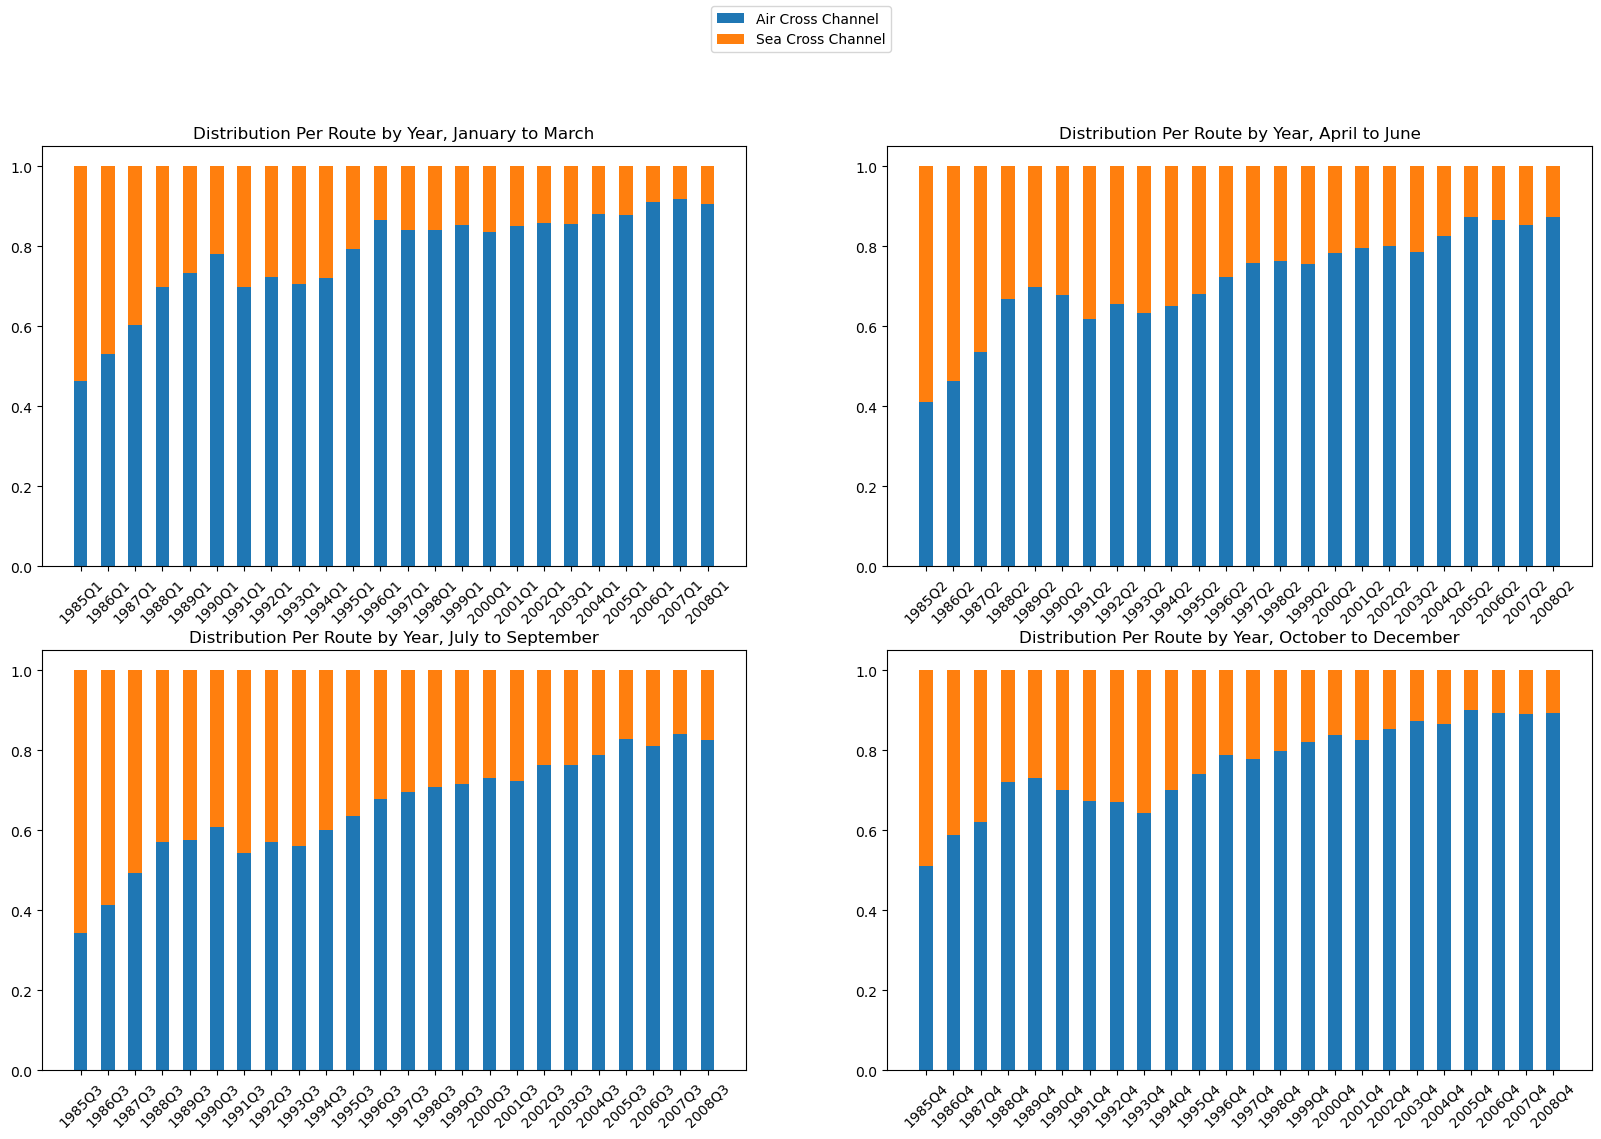

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

q1 = freqs.loc[(freqs['Quarter'] == 1)]
air1 = q1.loc[q1['Route of Travel'] == 'Air Cross Channel']
_ = axes[0, 0].bar(air1['year quarter'], air1['Distribution Per Route'], 0.5, label='Air Cross Channel', bottom=0)
sea1 = q1.loc[q1['Route of Travel'] == 'Sea Cross Channel']
_ = axes[0, 0].bar(sea1['year quarter'], sea1['Distribution Per Route'], 0.5, label='Sea Cross Channel', bottom=air1['Distribution Per Route'].to_numpy())

q2 = freqs.loc[(freqs['Quarter'] == 2)]
air2 = q2.loc[q2['Route of Travel'] == 'Air Cross Channel']
_ = axes[0, 1].bar(air2['year quarter'], air2['Distribution Per Route'], 0.5, label='Air Cross Channel', bottom=0)
sea2 = q2.loc[q2['Route of Travel'] == 'Sea Cross Channel']
_ = axes[0, 1].bar(sea2['year quarter'], sea2['Distribution Per Route'], 0.5, label='Sea Cross Channel', bottom=air2['Distribution Per Route'].to_numpy())

q3 = freqs.loc[(freqs['Quarter'] == 3)]
air3 = q3.loc[q3['Route of Travel'] == 'Air Cross Channel']
_ = axes[1, 0].bar(air3['year quarter'], air3['Distribution Per Route'], 0.5, label='Air Cross Channel', bottom=0)
sea3 = q3.loc[q3['Route of Travel'] == 'Sea Cross Channel']
_ = axes[1, 0].bar(sea3['year quarter'], sea3['Distribution Per Route'], 0.5, label='Sea Cross Channel', bottom=air3['Distribution Per Route'].to_numpy())

q4 = freqs.loc[(freqs['Quarter'] == 4)]
air4 = q4.loc[q4['Route of Travel'] == 'Air Cross Channel']
_ = axes[1, 1].bar(air4['year quarter'], air4['Distribution Per Route'], 0.5, label='Air Cross Channel', bottom=0)
sea4 = q4.loc[q4['Route of Travel'] == 'Sea Cross Channel']
_ = axes[1, 1].bar(sea4['year quarter'], sea4['Distribution Per Route'], 0.5, label='Sea Cross Channel', bottom=air4['Distribution Per Route'].to_numpy())

axes[0, 0].xaxis.set_tick_params(rotation=45)
axes[0, 0].set_title('Distribution Per Route by Year, January to March')

axes[0, 1].xaxis.set_tick_params(rotation=45)
axes[0, 1].set_title('Distribution Per Route by Year, April to June')

axes[1, 0].xaxis.set_tick_params(rotation=45)
axes[1, 0].set_title('Distribution Per Route by Year, July to September')

axes[1, 1].xaxis.set_tick_params(rotation=45)
axes[1, 1].set_title('Distribution Per Route by Year, October to December')

# Taken from https://stackoverflow.com/questions/9834452/how-do-i-make-a-single-legend-for-many-subplots
h, l = axes[0, 0].get_legend_handles_labels()
fig.legend(h, l, loc='upper center')

plt.show();


### Merge Air and Sea Cross channel values into combined Cross Channel values

In [88]:
def merge_air_and_sea(df, common_cols):
    # Select cross channel travel by both sea and air for each quarter and year from the dataset
    cross_channel_df = df[df.isin(['Air Cross Channel', 'Sea Cross Channel'])['Route of Travel']==True]
    #pd.set_option('display.max_rows', cross_channel_df.shape[0]+1)
    cross_channel_df.shape
    
    # Combine Air and Sea cross channel travel into Cross channel travel dataframe
    combined_cross_channel = cross_channel_df.groupby(common_cols, as_index=False).sum()
    combined_cross_channel['Route of Travel'] = 'Cross Channel'
    combined_cross_channel.shape

    # Remove Air and Sea Cross Channel travel from original dataset
    df = df.drop(df[df.isin(['Air Cross Channel', 'Sea Cross Channel'])['Route of Travel']==True].index)
    # Concatenate original dataset with new Cross Channel travel dataset
    df = pd.concat([df, combined_cross_channel], axis=0, ignore_index=True)
    #pd.set_option('display.max_rows', df.shape[0]+1)
    # df
    # Change order of routes to "All Routes", "Cross Channel", "Continental Europe", and "Transatlantic" to be consistent with the original dataset.
    concatenated_df = pd.concat([df[df['Route of Travel'] == 'All Routes'],
                                df[df['Route of Travel'] == 'Cross Channel'],
                                df[df['Route of Travel'] == 'Continental Europe'],
                                df[df['Route of Travel'] == 'Transatlantic']])

    # Reset the index of the concatenated dataframe
    concatenated_df.reset_index(drop=True, inplace=True)
    return concatenated_df

In [89]:
concatenated_route_quarter_tourism = merge_air_and_sea(route_quarter_tourism, ['Year', 'Quarter', 'Direction'])
concatenated_route_quarter_tourism['Route of Travel'].value_counts()

Route of Travel
All Routes            192
Cross Channel         192
Continental Europe    192
Transatlantic         192
Name: count, dtype: int64

In [90]:
# Display the shape of the concatenated dataframe for the distribution per Route of Travel 
concatenated_route_quarter_tourism.shape
concatenated_route_quarter_tourism.head()
concatenated_route_quarter_tourism.tail()

(768, 5)

,Route of Travel,Year,Quarter,Direction,"Travellers x(1,000)"
0,All Routes,1985,1,Visitors to Ireland,254
1,All Routes,1985,1,Visits Abroad by Irish Residents,186
2,All Routes,1985,2,Visitors to Ireland,495
3,All Routes,1985,2,Visits Abroad by Irish Residents,336
4,All Routes,1985,3,Visitors to Ireland,840


,Route of Travel,Year,Quarter,Direction,"Travellers x(1,000)"
763,Transatlantic,2008,2,Visits Abroad by Irish Residents,115
764,Transatlantic,2008,3,Visitors to Ireland,218
765,Transatlantic,2008,3,Visits Abroad by Irish Residents,142
766,Transatlantic,2008,4,Visitors to Ireland,101
767,Transatlantic,2008,4,Visits Abroad by Irish Residents,152


## Removing All routes values for Route of Travel

In [91]:
concatenated_route_quarter_tourism = concatenated_route_quarter_tourism.drop(concatenated_route_quarter_tourism[concatenated_route_quarter_tourism.isin(['All Routes'])['Route of Travel']==True].index)

concatenated_route_quarter_tourism


,Route of Travel,Year,Quarter,Direction,"Travellers x(1,000)"
192,Cross Channel,1985,1,Visitors to Ireland,211
193,Cross Channel,1985,1,Visits Abroad by Irish Residents,140
194,Cross Channel,1985,2,Visitors to Ireland,366
195,Cross Channel,1985,2,Visits Abroad by Irish Residents,221
196,Cross Channel,1985,3,Visitors to Ireland,608
...,...,...,...,...,...
763,Transatlantic,2008,2,Visits Abroad by Irish Residents,115
764,Transatlantic,2008,3,Visitors to Ireland,218
765,Transatlantic,2008,3,Visits Abroad by Irish Residents,142
766,Transatlantic,2008,4,Visitors to Ireland,101


In [92]:
concateneated_freqs = calculate_frequencies(concatenated_route_quarter_tourism)
concateneated_freqs

(576, 5)
(576,)


,Route of Travel,Year,Quarter,Direction,"Travellers x(1,000)",Distribution Per Route
0,Continental Europe,1985,1,Visitors to Ireland,28,0.110236
1,Cross Channel,1985,1,Visitors to Ireland,211,0.830709
2,Transatlantic,1985,1,Visitors to Ireland,15,0.059055
3,Continental Europe,1985,1,Visits Abroad by Irish Residents,41,0.220430
4,Cross Channel,1985,1,Visits Abroad by Irish Residents,140,0.752688
...,...,...,...,...,...,...
571,Cross Channel,2008,4,Visitors to Ireland,981,0.589189
572,Transatlantic,2008,4,Visitors to Ireland,101,0.060661
573,Continental Europe,2008,4,Visits Abroad by Irish Residents,806,0.492966
574,Cross Channel,2008,4,Visits Abroad by Irish Residents,677,0.414067


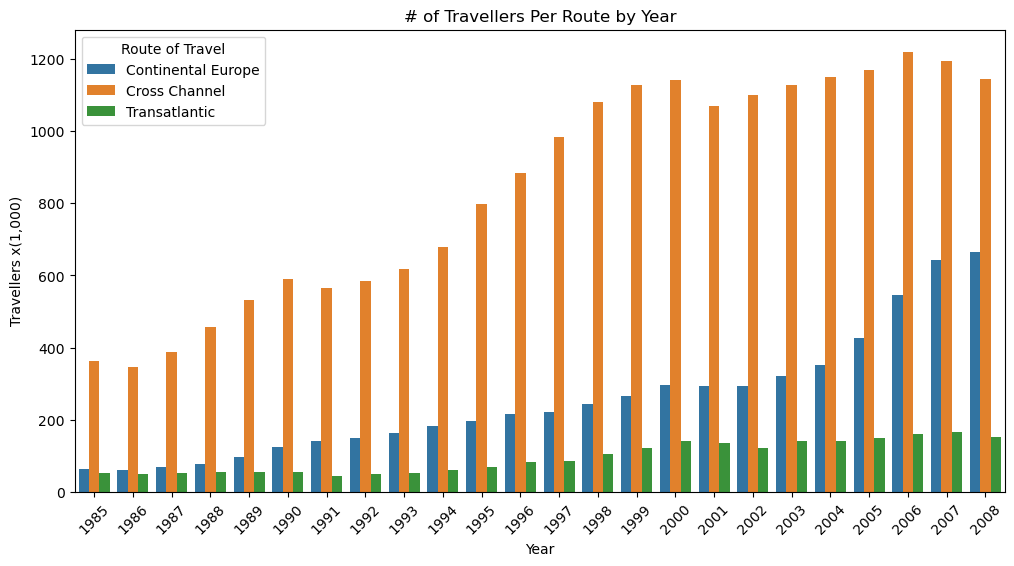

In [93]:
to_ireland = concatenated_route_quarter_tourism[concatenated_route_quarter_tourism['Direction'] == 'Visitors to Ireland']
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
ax = sns.barplot(x='Year', y='Travellers x(1,000)', data=to_ireland, hue='Route of Travel', ci=None)
ax.set_title('# of Travellers Per Route by Year');

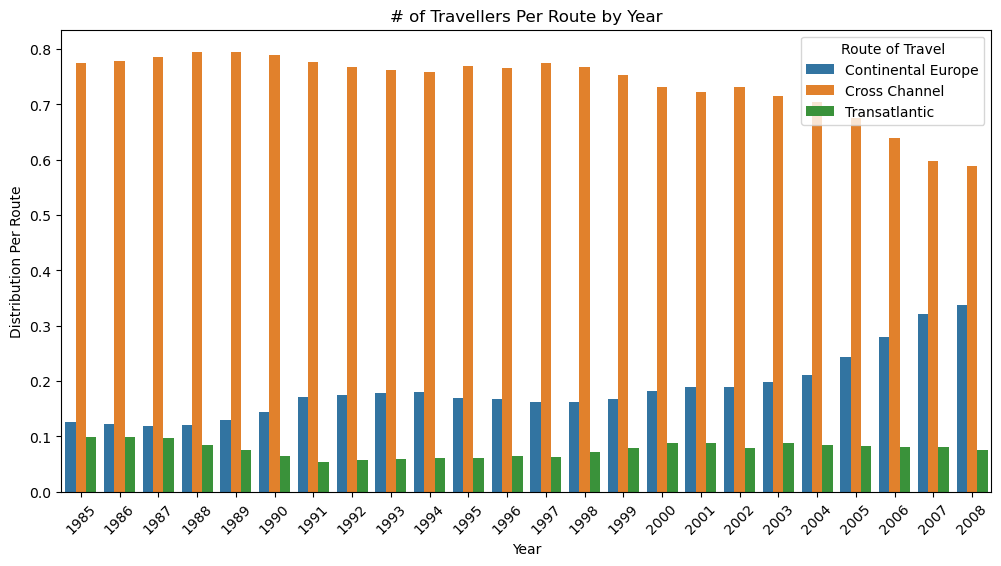

In [94]:
to_ireland = concatenated_route_quarter_tourism[concatenated_route_quarter_tourism['Direction'] == 'Visitors to Ireland']
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
ax = sns.barplot(x='Year', y='Distribution Per Route', data=to_ireland, hue='Route of Travel', ci=None)
ax.set_title('# of Travellers Per Route by Year');

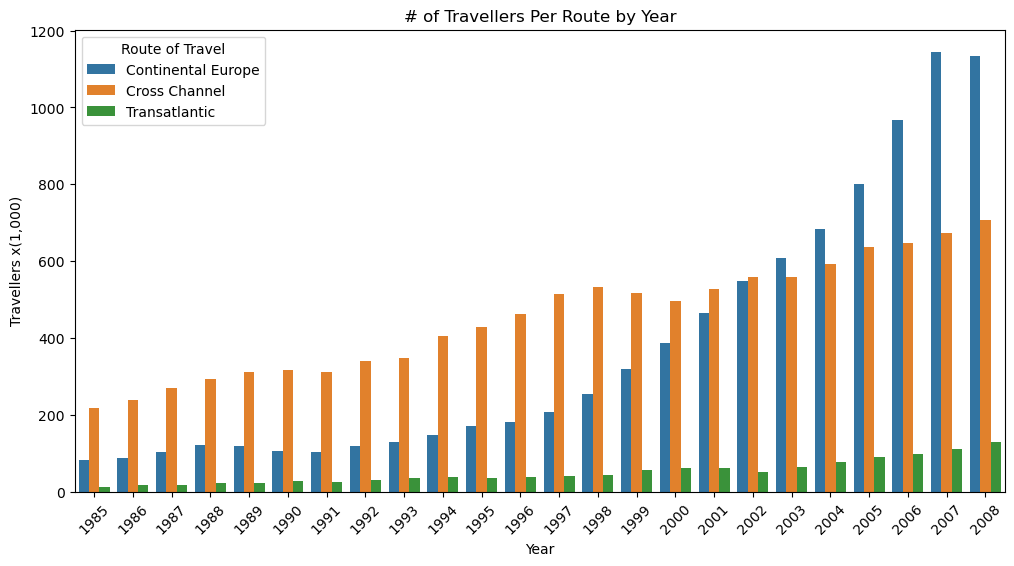

In [95]:
to_ireland = concatenated_route_quarter_tourism[concatenated_route_quarter_tourism['Direction'] == 'Visits Abroad by Irish Residents']
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
ax = sns.barplot(x='Year', y='Travellers x(1,000)', data=to_ireland, hue='Route of Travel', ci=None)
ax.set_title('# of Travellers Per Route by Year');

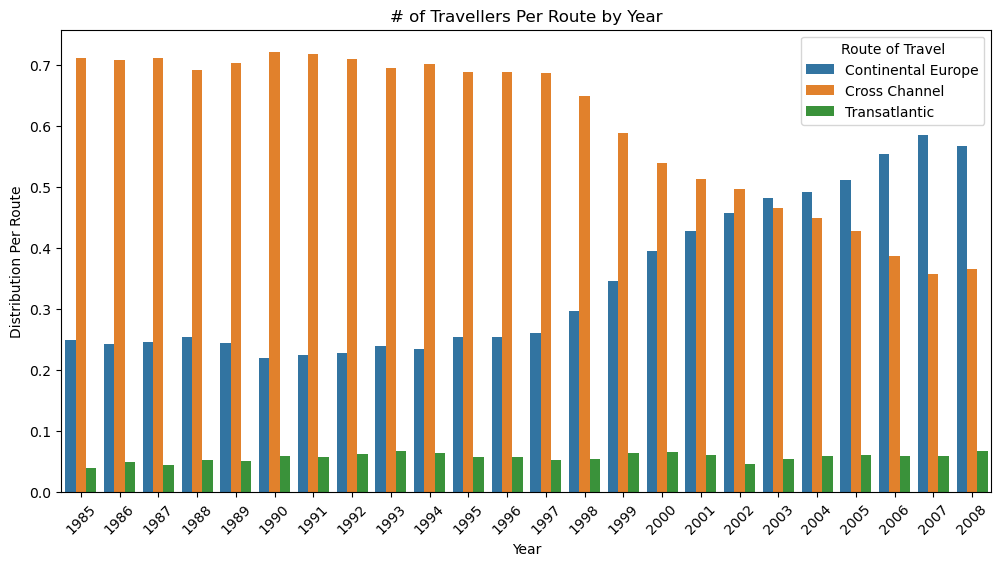

In [96]:
from_ireland = concatenated_route_quarter_tourism[concatenated_route_quarter_tourism['Direction'] == 'Visits Abroad by Irish Residents']
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
ax = sns.barplot(x='Year', y='Distribution Per Route', data=from_ireland, hue='Route of Travel', ci=None)
ax.set_title('# of Travellers Per Route by Year');

## Dataset 4_reason - Exploration and Cleaning
#### Explore reason dataset
#### Dataset describes travel to and from Ireland by all routes between the years of 1976 and 2008, yearly, with lenght of stay, reason for travel and expenditure .

In [121]:
# Read csv file into pandas dataframe 
# url = https://data.gov.ie/dataset/tma05-visits-to-and-from-ireland/resource/3fe9ec9d-c16f-47dc-92e3-6749c6361d7c

reason_df = pd.read_csv("TMA05-Visits-to-and-from-Ireland.csv")
reason_df.shape
reason_df.head(20)

(792, 8)

,C02118V02559,Reason for Journey,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
0,1,Holiday/leisure/recreation,1976,1976,TMA05C1,Expenditure by Vistors to Ireland,Euro Million,69.0
1,1,Holiday/leisure/recreation,1976,1976,TMA05C2,Visitors to Ireland,Thousand,553.0
2,1,Holiday/leisure/recreation,1976,1976,TMA05C3,Average Length of Stay by Visitors to Ireland,Nights,NaN
3,1,Holiday/leisure/recreation,1976,1976,TMA05C4,Expenditure by Irish Residents Abroad,Euro Million,81.0
4,1,Holiday/leisure/recreation,1976,1976,TMA05C5,Visits Abroad by Irish Residents,Thousand,428.0
5,1,Holiday/leisure/recreation,1976,1976,TMA05C6,Average Length of Stay Abroad by Irish Residents,Nights,NaN
6,1,Holiday/leisure/recreation,1977,1977,TMA05C1,Expenditure by Vistors to Ireland,Euro Million,98.0
7,1,Holiday/leisure/recreation,1977,1977,TMA05C2,Visitors to Ireland,Thousand,665.0
8,1,Holiday/leisure/recreation,1977,1977,TMA05C3,Average Length of Stay by Visitors to Ireland,Nights,NaN
9,1,Holiday/leisure/recreation,1977,1977,TMA05C4,Expenditure by Irish Residents Abroad,Euro Million,94.0


In [122]:
reason_df.drop(columns=['C02118V02559', 'TLIST(A1)', 'STATISTIC'], inplace=True)
reason_df.rename(columns={"Statistic Label": "Direction"}, inplace=True)

In [123]:
reason_df['Reason for Journey'].value_counts()
reason_df['Direction'].value_counts()
reason_df['UNIT'].value_counts()
reason_df['VALUE'].isna().sum() # Less than 10% of the data is missing

Reason for Journey
Holiday/leisure/recreation    198
Visit to friends/relatives    198
Business                      198
Other reason for journey      198
Name: count, dtype: int64

Direction
Expenditure by Vistors to Ireland                   132
Visitors to Ireland                                 132
Average Length of Stay by Visitors to Ireland       132
Expenditure by Irish Residents Abroad               132
Visits Abroad by Irish Residents                    132
Average Length of Stay Abroad by Irish Residents    132
Name: count, dtype: int64

UNIT
Euro Million    264
Thousand        264
Nights          264
Name: count, dtype: int64

56

In [124]:
# Extract expenditure data
expenditure_df = reason_df.loc[(reason_df['Direction'] == 'Expenditure by Vistors to Ireland') | (reason_df['Direction'] == 'Expenditure by Irish Residents Abroad')].reset_index(drop=True)

# Extract number of travellers data
travellors_df = reason_df.loc[(reason_df['Direction'] == 'Visitors to Ireland') | (reason_df['Direction'] == 'Visits Abroad by Irish Residents')].reset_index(drop=True)

# Extract average length of stay data
duration_df = reason_df.loc[(reason_df['Direction'] == 'Average Length of Stay by Visitors to Ireland') | (reason_df['Direction'] == 'Average Length of Stay Abroad by Irish Residents')].reset_index(drop=True)

expenditure_df.shape
travellors_df.shape
duration_df.shape

(264, 5)

(264, 5)

(264, 5)

In [125]:
# Renaming column values to enable concatenation of the two datasets
direction_mapping = {'Expenditure by Vistors to Ireland': 'Visitors to Ireland',
                     'Expenditure by Irish Residents Abroad': 'Visits Abroad by Irish Residents',
                     'Average Length of Stay by Visitors to Ireland': 'Visitors to Ireland',
                     'Average Length of Stay Abroad by Irish Residents': 'Visits Abroad by Irish Residents'}

expenditure_df["Direction"]=expenditure_df['Direction'].apply(lambda x: direction_mapping[x])
duration_df["Direction"]=duration_df['Direction'].apply(lambda x: direction_mapping[x])

In [126]:
expenditure_df.rename(columns={"VALUE": "Expenditure (x € Mil)"}, inplace=True)
expenditure_df.drop(columns=['UNIT'], inplace=True)

travellors_df.rename(columns={"VALUE": "Travellers (x 1,000)"}, inplace=True)
travellors_df.drop(columns=['UNIT'], inplace=True)

duration_df.rename(columns={"VALUE": "Avg Length of Stay (x Nights)"}, inplace=True)
duration_df.drop(columns=['UNIT'], inplace=True)

In [127]:
expenditure_df.head()
travellors_df.head()
duration_df.head(200)

,Reason for Journey,Year,Direction,Expenditure (x € Mil)
0,Holiday/leisure/recreation,1976,Visitors to Ireland,69.0
1,Holiday/leisure/recreation,1976,Visits Abroad by Irish Residents,81.0
2,Holiday/leisure/recreation,1977,Visitors to Ireland,98.0
3,Holiday/leisure/recreation,1977,Visits Abroad by Irish Residents,94.0
4,Holiday/leisure/recreation,1978,Visitors to Ireland,132.0


,Reason for Journey,Year,Direction,"Travellers (x 1,000)"
0,Holiday/leisure/recreation,1976,Visitors to Ireland,553.0
1,Holiday/leisure/recreation,1976,Visits Abroad by Irish Residents,428.0
2,Holiday/leisure/recreation,1977,Visitors to Ireland,665.0
3,Holiday/leisure/recreation,1977,Visits Abroad by Irish Residents,420.0
4,Holiday/leisure/recreation,1978,Visitors to Ireland,838.0


,Reason for Journey,Year,Direction,Avg Length of Stay (x Nights)
0,Holiday/leisure/recreation,1976,Visitors to Ireland,NaN
1,Holiday/leisure/recreation,1976,Visits Abroad by Irish Residents,NaN
2,Holiday/leisure/recreation,1977,Visitors to Ireland,NaN
3,Holiday/leisure/recreation,1977,Visits Abroad by Irish Residents,NaN
4,Holiday/leisure/recreation,1978,Visitors to Ireland,NaN
5,Holiday/leisure/recreation,1978,Visits Abroad by Irish Residents,NaN
6,Holiday/leisure/recreation,1979,Visitors to Ireland,NaN
7,Holiday/leisure/recreation,1979,Visits Abroad by Irish Residents,NaN
8,Holiday/leisure/recreation,1980,Visitors to Ireland,NaN
9,Holiday/leisure/recreation,1980,Visits Abroad by Irish Residents,NaN


In [128]:
final_df = travellors_df.merge(expenditure_df, on=['Year', 'Direction', 'Reason for Journey'], how='outer')
final_df = final_df.merge(duration_df, on=['Year', 'Direction', 'Reason for Journey'], how='outer')
final_df = final_df.reindex(columns=['Year', 'Direction', 'Reason for Journey', 'Travellers (x 1,000)', 'Expenditure (x € Mil)', 'Avg Length of Stay (x Nights)'])


In [129]:
pd.set_option('display.max_rows', final_df.shape[0]+1)
final_df.head(20)

,Year,Direction,Reason for Journey,"Travellers (x 1,000)",Expenditure (x € Mil),Avg Length of Stay (x Nights)
0,1976,Visitors to Ireland,Business,188.0,15.0,NaN
1,1976,Visitors to Ireland,Holiday/leisure/recreation,553.0,69.0,NaN
2,1976,Visitors to Ireland,Other reason for journey,75.0,4.0,NaN
3,1976,Visitors to Ireland,Visit to friends/relatives,494.0,43.0,NaN
4,1976,Visits Abroad by Irish Residents,Business,150.0,33.0,NaN
5,1976,Visits Abroad by Irish Residents,Holiday/leisure/recreation,428.0,81.0,NaN
6,1976,Visits Abroad by Irish Residents,Other reason for journey,87.0,10.0,NaN
7,1976,Visits Abroad by Irish Residents,Visit to friends/relatives,222.0,32.0,NaN
8,1977,Visitors to Ireland,Business,214.0,20.0,NaN
9,1977,Visitors to Ireland,Holiday/leisure/recreation,665.0,98.0,NaN


In [130]:
final_df.dtypes


Year                               int64
Direction                         object
Reason for Journey                object
Travellers (x 1,000)             float64
Expenditure (x € Mil)            float64
Avg Length of Stay (x Nights)    float64
dtype: object

In [131]:
# TODO: Fill out values for Avg Length of Stay
# TODO: Visualize data and see disttibution by reasons
# TODO: Statistics on data (probability of person being on buziness travel if...)
# TODO: ML Classification -> Random Forest, Decision Tree, etc - prediction for reason for travel

In [133]:
from sklearn.impute import KNNImputer

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in final_df

In [137]:
# Just pass in the colum - it imputes with mean value
one_col_impute = pd.DataFrame(imputer.fit_transform(final_df[['Avg Length of Stay (x Nights)']]))
one_col_impute.head(10)

,0
0,9.217308
1,9.217308
2,9.217308
3,9.217308
4,9.217308
5,9.217308
6,9.217308
7,9.217308
8,9.217308
9,9.217308


In [138]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

encoded = enc.fit_transform(final_df[['Direction', 'Reason for Journey']])
encoded_df = pd.DataFrame(encoded, columns=['Direction', 'Reason for Journey'])
encoded_df.head()

final_df_encoded = final_df.copy()
final_df_encoded['Direction'] = encoded_df['Direction']
final_df_encoded['Reason for Journey'] = encoded_df['Reason for Journey']

final_df_encoded.head()

,Direction,Reason for Journey
0,0.0,0.0
1,0.0,1.0
2,0.0,2.0
3,0.0,3.0
4,1.0,0.0


,Year,Direction,Reason for Journey,"Travellers (x 1,000)",Expenditure (x € Mil),Avg Length of Stay (x Nights)
0,1976,0.0,0.0,188.0,15.0,NaN
1,1976,0.0,1.0,553.0,69.0,NaN
2,1976,0.0,2.0,75.0,4.0,NaN
3,1976,0.0,3.0,494.0,43.0,NaN
4,1976,1.0,0.0,150.0,33.0,NaN


In [139]:
final_df_imputed = pd.DataFrame(imputer.fit_transform(final_df_encoded), columns=['Year', 'Direction', 'Reason for Journey', 'Travellers (x 1,000)', 'Expenditure (x € Mil)', 'Avg Length of Stay (x Nights)'])
final_df_imputed.loc[(final_df_imputed['Reason for Journey']==1.0)].head(20)

,Year,Direction,Reason for Journey,"Travellers (x 1,000)",Expenditure (x € Mil),Avg Length of Stay (x Nights)
1,1976.0,0.0,1.0,553.0,69.0,5.66
5,1976.0,1.0,1.0,428.0,81.0,4.04
9,1977.0,0.0,1.0,665.0,98.0,11.26
13,1977.0,1.0,1.0,420.0,94.0,5.48
17,1978.0,0.0,1.0,838.0,132.0,10.72
21,1978.0,1.0,1.0,540.0,136.0,5.66
25,1979.0,0.0,1.0,790.0,140.0,11.16
29,1979.0,1.0,1.0,588.0,185.0,8.28
33,1980.0,0.0,1.0,703.0,142.0,11.26
37,1980.0,1.0,1.0,583.0,223.0,8.04


In [144]:
imputed_cols_dropped = pd.DataFrame(imputer.fit_transform(final_df_encoded.drop(columns=['Travellers (x 1,000)', 'Expenditure (x € Mil)'])), columns=['Year', 'Direction', 'Reason for Journey', 'Avg Length of Stay (x Nights)'])
imputed_cols_dropped.loc[(final_df_imputed['Reason for Journey']==1.0)].head(20)

,Year,Direction,Reason for Journey,Avg Length of Stay (x Nights)
1,1976.0,0.0,1.0,7.52
5,1976.0,1.0,1.0,7.48
9,1977.0,0.0,1.0,7.52
13,1977.0,1.0,1.0,7.48
17,1978.0,0.0,1.0,7.52
21,1978.0,1.0,1.0,7.48
25,1979.0,0.0,1.0,7.52
29,1979.0,1.0,1.0,7.48
33,1980.0,0.0,1.0,7.52
37,1980.0,1.0,1.0,7.48


In [143]:
final_df.loc[(final_df['Reason for Journey']=='Holiday/leisure/recreation')]

,Year,Direction,Reason for Journey,"Travellers (x 1,000)",Expenditure (x € Mil),Avg Length of Stay (x Nights)
1,1976,Visitors to Ireland,Holiday/leisure/recreation,553.0,69.0,NaN
5,1976,Visits Abroad by Irish Residents,Holiday/leisure/recreation,428.0,81.0,NaN
9,1977,Visitors to Ireland,Holiday/leisure/recreation,665.0,98.0,NaN
13,1977,Visits Abroad by Irish Residents,Holiday/leisure/recreation,420.0,94.0,NaN
17,1978,Visitors to Ireland,Holiday/leisure/recreation,838.0,132.0,NaN
21,1978,Visits Abroad by Irish Residents,Holiday/leisure/recreation,540.0,136.0,NaN
25,1979,Visitors to Ireland,Holiday/leisure/recreation,790.0,140.0,NaN
29,1979,Visits Abroad by Irish Residents,Holiday/leisure/recreation,588.0,185.0,NaN
33,1980,Visitors to Ireland,Holiday/leisure/recreation,703.0,142.0,NaN
37,1980,Visits Abroad by Irish Residents,Holiday/leisure/recreation,583.0,223.0,NaN


In [145]:
# TODO: try a regression imputer https://datasciencestunt.com/regression-imputation/